input: # of words in each sentence
outuput: if there is plagiarism or not
tot # of words: 96858
tot # of words (after cleaning text): 96730
tot # of verses: 14753
tot # of verses (after cleaning text): 14342
tot # of DISTINCT words (after cleaning text): 13958

data structures:
an hash table to store the fingerprints for each sentence

algorithm for detect plagiarism:
compute the hash of a sentence to check
if the hash table with the fingerprints contains the computed hash:
    return True
else
    return False

In [142]:
import numpy as np
import pandas as pd
import math
import re
from pympler import asizeof
import hashlib

In [143]:
number_of_words = 0
with open(r'divina_commedia.txt','r') as file:
    data = file.read()

data = re.sub(' +', ' ', data)
data = re.sub('[\n]+', '\n', data)
data = re.sub(r"[^\w\d'\s]+", '', data)
data = data.lower()
lines = data.split("\n")

for line in lines:
    number_of_words += len(line.split())

print(number_of_words)
print(len(lines))
print(len(set(data.split())))

96730
14342
13958


In [144]:
def create_sentences(data, n):
    words = data.split()
    sentences = []
    for i in range(len(data.split()) - n):
        sentence = " ".join(words[i:i+n])
        sentences.append(sentence)

    return set(sentences)

In [145]:
def get_len_and_size(data):
    print("len of the set:", len(data))
    print("actual size of the set:", asizeof.asizeof(data))
    return len(data), asizeof.asizeof(data)

In [146]:
def get_bits_fingerprint(m, epsilon):
    b = math.log(m/epsilon, 2)
    return math.ceil(b)  # round up to the next integer

In [147]:
def get_range_fingerprint(m, epsilon):
    n = m/epsilon
    return math.ceil(n)  # round up to the next integer

In [148]:
def get_hash(sentence, n):
    sentence_hash = hashlib.md5(sentence.encode('utf-8')) # md5 hash
    sentence_hash_int = int(sentence_hash.hexdigest(), 16) # md5 hash in integer format (convert to integer just to take less value since we don't need 128 bits hash
    h = sentence_hash_int % n # map into [0,n-1]
    return h

In [ ]:
sentences4 = create_sentences(data, 4)
_, _ = get_len_and_size(sentences4)

In [ ]:
sentences8 = create_sentences(data, 8)
_, _ = get_len_and_size(sentences8)

In [153]:
def stored_data(data):
    counter = 0
    tot_data = 0

    for line in data:
        tot_data += asizeof.asizeof(line)
        counter += 1

    return tot_data, math.ceil(tot_data / counter)

In [154]:
stored_data(sentences4)

(7516160, 79)

In [155]:
stored_data(sentences8)

(10001896, 104)

In [158]:
l4 = []
l8 = []
epsilons = []
m4, _ = get_len_and_size(sentences4)
m8, _ = get_len_and_size(sentences8)

for epsilon in np.logspace(-6, 0, num=1000):
    b = get_bits_fingerprint(m4, epsilon)
    l4.append(b)
    b = get_bits_fingerprint(m8, epsilon)
    l8.append(b)
    epsilons.append(epsilon)

len of the set: 96120
actual size of the set: 11710680
len of the set: 96715
actual size of the set: 14196416


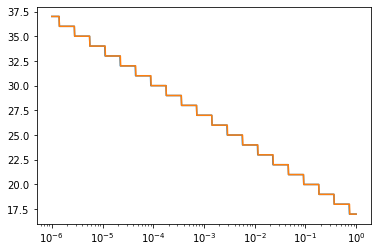

In [166]:
import matplotlib.pyplot as plt

plt.plot(epsilons, l4)
plt.plot(epsilons, l8)
plt.xscale("log")

In [167]:
n = get_range_fingerprint(96120, 1e-4)
e = next(iter(sentences4))
get_hash(e, n)

239700197

In [238]:
l4 = []
l8 = []
epsilons = []
m4, _ = get_len_and_size(sentences4)
m8, _ = get_len_and_size(sentences8)

for epsilon in np.logspace(-6, 0, num=1000):
    # b = get_bits_fingerprint(m4, epsilon)
    # l4.append(b*m4/8)
    # b = get_bits_fingerprint(m8, epsilon)
    # l8.append(b*m8/8)
    n = get_range_fingerprint(m4, epsilon)
    e = next(iter(sentences4))
    h = get_hash(e, n)
    l4.append(asizeof.asizeof(h) * m4 / 8)
    n = get_range_fingerprint(m8, epsilon)
    e = next(iter(sentences8))
    h = get_hash(e, n)
    l8.append(asizeof.asizeof(h) * m8 / 8)
    epsilons.append(epsilon)

len of the set: 96120
actual size of the set: 11710680
len of the set: 96715
actual size of the set: 14196416


len of the set: 96120
actual size of the set: 11710680
len of the set: 96715
actual size of the set: 14196416


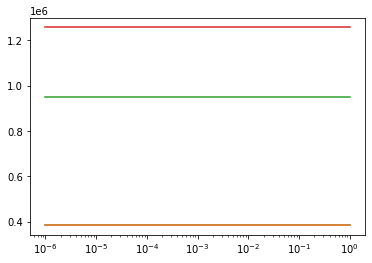

In [239]:
m4, avg4 = get_len_and_size(sentences4)
m8, avg8 = get_len_and_size(sentences8)
_, avg4 = stored_data(sentences4)
_, avg8 = stored_data(sentences8)

plt.plot(epsilons, l4)
plt.plot(epsilons, l8)
plt.plot(epsilons, np.full(len(epsilons), avg4 * m4 / 8))
plt.plot(epsilons, np.full(len(epsilons), avg8 * m8 / 8))
plt.xscale("log")
plt.show()

In [241]:
for epsilon in np.logspace(-6, 0, num=1000):
    # b = get_bits_fingerprint(m4, epsilon)
    # l4.append(b*m4/8)
    # b = get_bits_fingerprint(m8, epsilon)
    # l8.append(b*m8/8)
    print(get_range_fingerprint(m4, epsilon))

96120000000
94799873131
93497877086
92213762856
90947284848
89698200844
88466271952
87251262561
86052940296
84871075973
83705443556
82555820115
81421985779
80303723698
79200820000
78113063752
77040246915
75982164310
74938613574
73909395124
72894312119
71893170421
70905778556
69931947683
68971491553
68024226476
67089971283
66168547294
65259778284
64363490448
63479512366
62607674976
61747811535
60899757590
60063350949
59238431645
58424841910
57622426141
56831030874
56050504752
55280698495
54521464876
53772658688
53034136720
52305757726
51587382401
50878873353
50180095078
49490913931
48811198104
48140817599
47479644203
46827551464
46184414666
45550110809
44924518579
44307518328
43698992054
43098823373
42506897501
41923101230
41347322907
40779452413
40219381138
39667001969
39122209261
38584898819
38054967882
37532315097
37016840507
36508445524
36007032915
35512506785
35024772552
34543736937
34069307939
33601394821
33139908095
32684759498
32235861982
31793129693
31356477958
30925823265
3050